<a href="https://colab.research.google.com/github/mylethidiem/ProgramingTech/blob/main/tools/data_jobs_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference [here](https://colab.research.google.com/drive/18_jRwXA_pEdPK_bbdQApE9XRKlF34LwQ?usp=sharing)

In [ ]:
import pandas as pd
import re
from collections import Counter

In [ ]:
data = pd.read_csv('/content/dataset_linkedin-jobs-scraper_2024-10-21_23-43-57-001.csv')

# Inspect the first few rows
print(data.head())

                  applicationsCount   applyType  \
0  Be among the first 25 applicants    EXTERNAL   
1               Over 200 applicants    EXTERNAL   
2                     25 applicants    EXTERNAL   
3  Be among the first 25 applicants    EXTERNAL   
4               Over 200 applicants  EASY_APPLY   

                                            applyUrl  benefits  companyId  \
0             http://usa.applybe.com/?a=623BF0C4B6.0       NaN  1003064.0   
1             http://usa.applybe.com/?a=523BE31815.0       NaN  1003064.0   
2    https://smartjobs.qld.gov.au/jobs/QLD-596683-24       NaN     3274.0   
3             http://usa.applybe.com/?a=523C187D65.0       NaN  1003064.0   
4  https://au.linkedin.com/jobs/view/financial-an...       NaN  2850862.0   

             companyName                                         companyUrl  \
0         Rylem Staffing  https://www.linkedin.com/company/rylem?trk=pub...   
1         Rylem Staffing  https://www.linkedin.com/company/rylem?trk=pub

In [ ]:
skills = [
    'python', 'sql', 'excel', 'r studio', 'power bi', 'powerbi', 'tableau', 'machine learning',
    'deep learning', 'aws', 'azure', 'gcp', 'hadoop', 'spark', 'data visualization',
    'data analytics', 'statistics', 'numpy', 'pandas', 'scikit-learn', 'nlp', 'big data',

    'google analytics', 'data warehouse', 'snowflake', 'brick', 'mysql', 'sql server', 'postgres', 'olap', 'dax', 'power platform', 'power automate', 'database'
]

In [ ]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply preprocessing to job descriptions
data['clean_description'] = data['description'].apply(preprocess_text)

In [ ]:
def extract_skills(text, skills_list):
    found_skills = [skill for skill in skills_list if skill in text]
    return found_skills

# Extract skills from each job description
data['skills'] = data['clean_description'].apply(lambda x: extract_skills(x, skills))

In [ ]:
all_skills = data['skills'].sum()  # Flatten the list of lists
skill_counts = Counter(all_skills)  # Count occurrences

# Convert to a DataFrame for easier visualization
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency'])
skill_df = skill_df.sort_values(by='Frequency', ascending=False)

print(skill_df.head(20))  # Display the top 10 skills

                 Skill  Frequency
0                excel        397
1                  sql        197
3             database        146
4               python        126
9       data analytics         90
5             power bi         81
7                  aws         79
8                azure         61
12    machine learning         59
6              tableau         57
13          statistics         53
19               spark         42
23      data warehouse         35
2              powerbi         32
17  data visualization         27
21               brick         27
20            big data         26
25                 gcp         26
10           snowflake         21
26          sql server         17


# Dedup if one job mention a skill twice or more

In [ ]:
def extract_unique_skills(text, skills_list):
    text = text.replace('powerbi', 'power bi')
    found_skills = {skill for skill in skills_list if skill in text}  # Use a set for unique values
    return list(found_skills)  # Convert back to list if needed

# Extract unique skills from each job description
data['skills'] = data['clean_description'].apply(lambda x: extract_unique_skills(x, skills))

In [ ]:
data

,applicationsCount,applyType,applyUrl,benefits,companyId,companyName,companyUrl,contractType,description,experienceLevel,...,postedTime,posterFullName,posterProfileUrl,publishedAt,salary,sector,title,workType,clean_description,skills
0,Be among the first 25 applicants,EXTERNAL,http://usa.applybe.com/?a=623BF0C4B6.0,NaN,1003064.0,Rylem Staffing,https://www.linkedin.com/company/rylem?trk=pub...,Full-time,We are looking for a Data Entry Specialist who...,Not Applicable,...,2 weeks ago,NaN,NaN,2024-10-07,£25.00/hr - £50.00/hr,IT Services and IT Consulting,Entry-Level Data Entry Clerk Admin (Fully Remote),Administrative,we are looking for a data entry specialist who...,[excel]
1,Over 200 applicants,EXTERNAL,http://usa.applybe.com/?a=523BE31815.0,NaN,1003064.0,Rylem Staffing,https://www.linkedin.com/company/rylem?trk=pub...,Part-time,We are seeking a detail-oriented and efficient...,Not Applicable,...,2 weeks ago,NaN,NaN,2024-10-05,£25.00/hr - £50.00/hr,IT Services and IT Consulting,Data Entry - Typist Part-Time - Remote,Administrative,we are seeking a detailoriented and efficient ...,[excel]
2,25 applicants,EXTERNAL,https://smartjobs.qld.gov.au/jobs/QLD-596683-24,NaN,3274.0,Queensland Government,https://au.linkedin.com/company/queensland-gov...,Full-time,"Find purpose you feel, impact you see and a le...",Not Applicable,...,1 week ago,NaN,NaN,2024-10-10,NaN,Government Administration,Business Data Analyst,Information Technology,find purpose you feel impact you see and a leg...,"[database, sql, power bi, excel]"
3,Be among the first 25 applicants,EXTERNAL,http://usa.applybe.com/?a=523C187D65.0,NaN,1003064.0,Rylem Staffing,https://www.linkedin.com/company/rylem?trk=pub...,Full-time,We are seeking a highly organized and detail-o...,Not Applicable,...,1 week ago,NaN,NaN,2024-10-09,£25.00/hr - £50.00/hr,IT Services and IT Consulting,Data Entry Assistant(100% Remote),Administrative,we are seeking a highly organized and detailor...,"[database, excel]"
4,Over 200 applicants,EASY_APPLY,https://au.linkedin.com/jobs/view/financial-an...,NaN,2850862.0,Canva,https://au.linkedin.com/company/canva?trk=publ...,Full-time,About the FP&A Team\n\n\n\n\nOur Financial Pla...,Mid-Senior level,...,2 weeks ago,NaN,NaN,2024-10-04,NaN,Software Development and Graphic Design,Financial Analyst,Finance,about the fpa team\n\n\n\n\nour financial plan...,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,Be among the first 25 applicants,EASY_APPLY,https://au.linkedin.com/jobs/view/digital-stra...,NaN,24580.0,Squiz,https://au.linkedin.com/company/squiz?trk=publ...,Full-time,We are currently looking to add a Digital Stra...,Mid-Senior level,...,3 weeks ago,NaN,NaN,2024-09-26,NaN,Non-profit Organizations and Primary and Secon...,Digital Strategy Consultant (UX Strategy),Business Development and Sales,we are currently looking to add a digital stra...,[excel]
772,Be among the first 25 applicants,EXTERNAL,https://www.workforceaustralia.gov.au/individu...,NaN,69326792.0,Workforce Australia for Individuals,https://www.linkedin.com/company/workforceaust...,Full-time,We?re one of Australia?s most trusted brands. ...,Mid-Senior level,...,1 week ago,NaN,NaN,2024-10-14,NaN,Government Administration,Data Insights Lead,Information Technology,were one of australias most trusted brands bei...,[excel]
773,35 applicants,EASY_APPLY,https://au.linkedin.com/jobs/view/data-entry-a...,NaN,1003064.0,Rylem Staffing,https://www.linkedin.com/company/rylem?trk=pub...,Full-time,We are seeking a highly organized and detail-o...,Not Applicable,...,1 week ago,NaN,NaN,2024-10-12,£14.10/hr - £28.10/hr,IT Services and IT Consulting,Data Entry Assistant(100% Remote),Administrative,we are seeking a highly organized and detailor...,"[database, excel]"
774,120 applicants,EASY_APPLY,https://au.linkedin.com/jobs/view/junior-marke...,NaN,2194326.0,Reo Group,https://au.linkedin.com/company/reo-group-au?t...,Full-time,Role Overview:\n\nThe Junior Market Analyst wi..

In [ ]:
# Flatten the list of lists into a single list of skills
all_unique_skills = data['skills'].sum()

# Use Counter to count occurrences of each skill across all descriptions
skill_counts = Counter(all_unique_skills)

# Convert to DataFrame for easier visualization
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency'])
skill_df = skill_df.sort_values(by='Frequency', ascending=False)

# Display the top 10 skills
print(skill_df.head(20))

                 Skill  Frequency
0                excel        397
2                  sql        197
1             database        146
6               python        126
3             power bi        108
7       data analytics         90
4                  aws         79
8                azure         61
11    machine learning         59
5              tableau         57
13          statistics         53
19               spark         42
22      data warehouse         35
16  data visualization         27
21               brick         27
17            big data         26
24                 gcp         26
9            snowflake         21
25          sql server         17
18              hadoop         15


# Visualise

In [ ]:
!pip install pillow

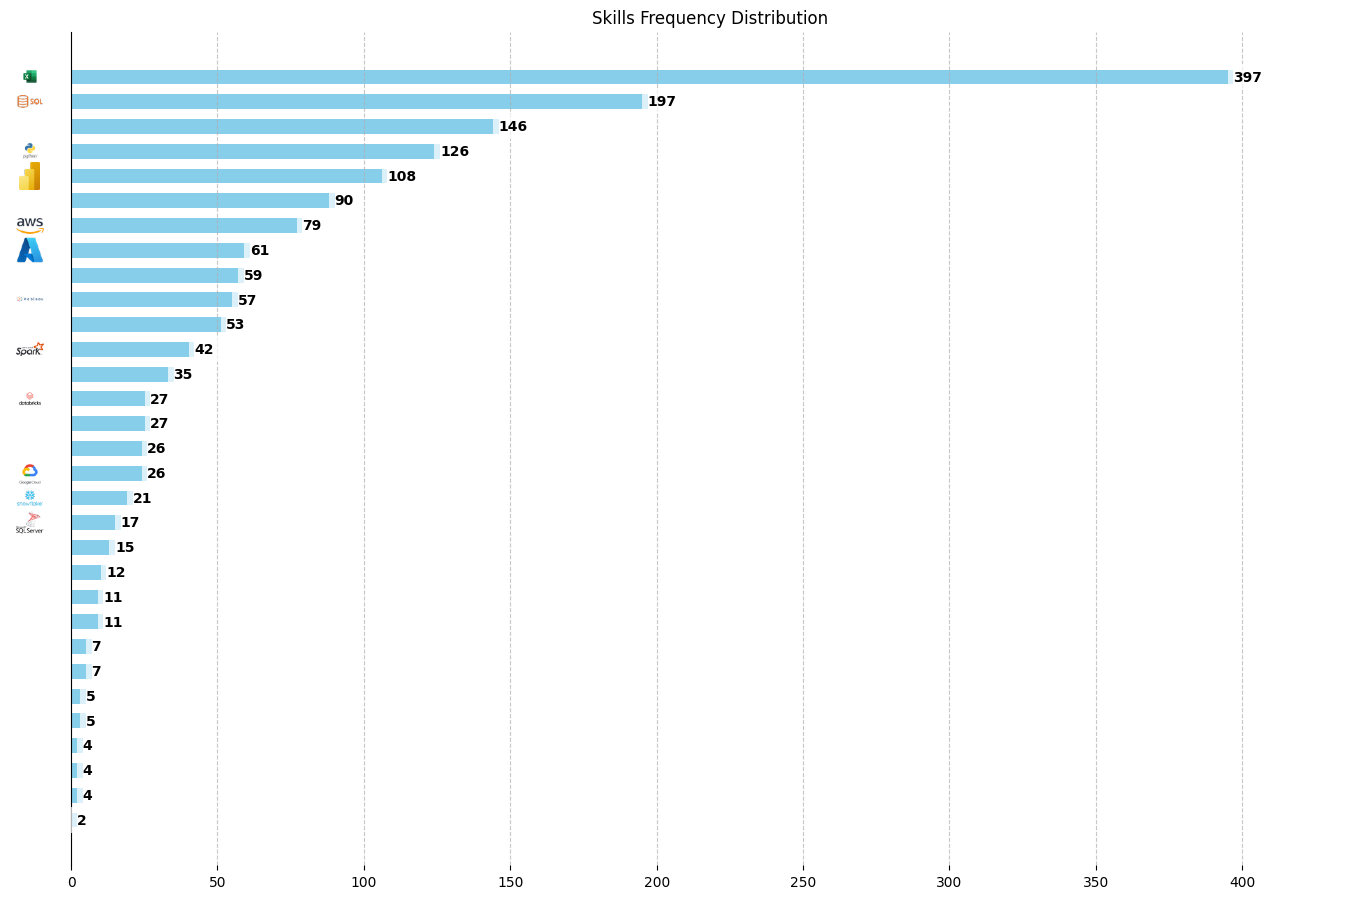

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import matplotlib.patches as patches
import os
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


# Sample data (replace this with actual counts from your code)
df = skill_df.copy()

def find_logo(skill, logos_folder='logos'):
    """Find a matching logo file for a given skill"""
    # List of common image extensions
    extensions = ['.png', '.jpg', '.jpeg', '.svg', '.gif']

    # Clean skill name (remove spaces, lowercase)
    skill = skill.lower().replace(' ', '')

    # Try to find an exact match
    for ext in extensions:
        filepath = os.path.join(logos_folder, f"{skill}{ext}")
        if os.path.exists(filepath):
            return filepath

    return None

def create_bar_chart_with_logos(df, logos_folder='logos', figsize=(15, 10)):
    # Sort DataFrame by frequency in descending order
    df = df.sort_values('Frequency', ascending=True)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)

    # Create horizontal bar chart
    bars = ax.barh(np.arange(len(df)), df['Frequency'], height=0.6, color='skyblue')

    # Customize chart
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['Skill'])
    ax.set_ylabel('')
    ax.set_yticks([])  # This removes the x-axis ticks
    ax.spines['top'].set_visible(False)  # Hide top border
    ax.spines['right'].set_visible(False)  # Hide right border
    ax.spines['bottom'].set_visible(False)  # Hide bottom borde
    ax.set_title('Skills Frequency Distribution')

    # Add grid lines
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)

    # Add value labels on the bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2,
                f'{int(width)}',
                ha='left', va='center', fontweight='bold',
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

        # Try to add logo
        skill = df.iloc[i]['Skill']
        logo_path = find_logo(skill, logos_folder)

        if logo_path:
            try:
                # Open and read the image
                img = Image.open(logo_path)

                # Convert to RGBA if not already
                if img.mode != 'RGBA':
                    img = img.convert('RGBA')

                # Resize image if it's too large
                max_size = 40  # maximum width or height in pixels
                ratio = min(max_size/img.size[0], max_size/img.size[1])
                new_size = tuple([int(dim * ratio) for dim in img.size])
                img = img.resize(new_size, Image.Resampling.LANCZOS)

                # Create an ImageBox and add it to the plot
                imagebox = OffsetImage(img, zoom=0.5)  # Adjust zoom as needed
                ab = AnnotationBbox(imagebox, (0, i),
                                  xybox=(-30, 0),  # Offset from y-axis
                                  xycoords=('data', 'data'),
                                  boxcoords="offset points",
                                  frameon=False)
                ax.add_artist(ab)
            except Exception as e:
                print(f"Could not load logo for {skill}: {e}")

    # Adjust layout to prevent label cutoff
    plt.margins(x=0.1)
    plt.tight_layout()

    return fig


# Create the visualization
chart = create_bar_chart_with_logos(df)

# Save or display the chart
plt.show()